In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
import os
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model, datasets
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [4]:
tick_name="tick"

def perdelta(start, end, delta):
    """ Iterator (used for listing date values within a range)
    @param start first value (in our case, a datetime.date value)
    @param end last value (in our case, a datetime.date value)
    @param delta step size (in our case, a datetime.timedelta value)
    """
    curr = start
    while curr < end:
        yield curr
        curr += delta

def prediction_modelbuilder(data_all, train_end_date,model):
    """ Build a model with data before the given data
    @param data_all input dataframe
    @param train_end_date end date
    @param model to fit the dataset
    """   
        
    # create train/test split based on data availability
    train = data_all[data_all['date'] < str(train_end_date)]
    
    train = train.dropna()
    
    # every dataframe variable not in this list will be used as input features for training
    # (note that the target variable also goes here)
    non_input_features = ['date', 'target']
    
    # build model
    model = model.fit(train.drop(non_input_features, axis=1), train['target'])
        
    return model

def rolling_prediction_scheme(data_all, from_date, to_date, retrain_how_often_days,progressbar=True):
    """
    Framework for evaluating daily predictions over a time period with GBM model
    @param data_all input dataframe
    @param from_date starting date
    @param to_date ending date
    @param retrain_how_often_days model training will happen on from_date
        and subsequently every <retrain_how_often_days>-th day
    """
    model = GradientBoostingRegressor(loss='ls', n_estimators=100, max_depth=5, \
                                      subsample=0.8, min_samples_leaf=10, learning_rate=0.1, \
                                      random_state=2016, verbose = 0)
#     model = linear_model.LogisticRegression(C=1e5)
#     model = KNeighborsClassifier(n_neighbors=5)
    
    return rolling_prediction_scheme_with_model(data_all, from_date, to_date, retrain_how_often_days, \
                                                model,progressbar)

def rolling_prediction_scheme_with_model(data_all, from_date, to_date, retrain_how_often_days, \
                                         model,progressbar=True):
    """
    Framework for evaluating daily predictions over a time period with a given model
    @param data_all input dataframe
    @param from_date starting date
    @param to_date ending date
    @param retrain_how_often_days model training will happen on from_date
        and subsequently every <retrain_how_often_days>-th day
    @param regression machine learning model to predict the dataset
    """   
    #all_available_dates will cover the days of the evaluation period
    all_available_dates = []
    for available_date in perdelta(from_date, to_date, timedelta(days=1)):
        all_available_dates.append(available_date)
        
#     print(all_available_dates)    
    
    # retrain list with length equal to all_available_dates
    retrain_flags = []
    for i in range(0, len(all_available_dates)):
        if i % retrain_how_often_days == 0:
            retrain_flags.append(True)
        else:
            retrain_flags.append(False)
#     print(retrain_flags)
            
    # we collect results in this list
    collected_preds = []

    # iterate over all_available_dates
    for available_date, retrain_flag in zip(all_available_dates, retrain_flags):
        
        # one-day-ahead prediction
        target_date = available_date + timedelta(days = 1)
        if progressbar==True:
            print(target_date)
        
        # create train/test split based on data availability
        train = data_all[data_all['date'] < str(available_date)].copy()
        test = data_all[data_all['date'] == str(target_date)].copy()
        
        train = train.dropna()
        
        # every dataframe variable not in this list will be used as input features for training
        # (note that the target variable also goes here)
        non_input_features = ['date', 'target']
        
        # build model
        if retrain_flag is True:
            model = model.fit(train.drop(non_input_features, axis=1), train['target'])
        
        # get predictions
        test['prediction'] = model.predict(test.drop(non_input_features, axis=1))
        
        # add predictions of this iteration to collected results
        collected_preds.append(test[['date',tick_name, 'target', 'prediction']])

    # we make a dataframe from the collected results
    collected_preds = pd.concat(collected_preds)
        
    return collected_preds



def mape(actual, predicted):
    """calculate mean absolute percentage error (MAPE)
    @param actual vector of actual target values
    @param predicted vector of predicted target values
    """
    return np.mean(np.abs((actual - predicted) / actual)) * 100

2016-01-10
2016-01-11
2016-01-12
2016-01-13
2016-01-14
2016-01-15
2016-01-16
2016-01-17
2016-01-18
2016-01-19
2016-01-20
2016-01-21
2016-01-22
2016-01-23
2016-01-24
2016-01-25
2016-01-26
2016-01-27
2016-01-28
2016-01-29
2016-01-30
2016-01-31
2016-02-01
2016-02-02
2016-02-03
2016-02-04
2016-02-05
2016-02-06
2016-02-07
2016-02-08
2016-02-09
2016-02-10
2016-02-11
2016-02-12
2016-02-13
2016-02-14
2016-02-15
2016-02-16
2016-02-17
2016-02-18
2016-02-19
2016-02-20
2016-02-21
2016-02-22
2016-02-23
2016-02-24
2016-02-25
2016-02-26
2016-02-27
2016-02-28
2016-02-29
2016-03-01
2016-03-02
2016-03-03
2016-03-04
2016-03-05
2016-03-06
2016-03-07
2016-03-08
2016-03-09
2016-03-10
2016-03-11
2016-03-12
2016-03-13
2016-03-14
2016-03-15
2016-03-16
2016-03-17
2016-03-18
2016-03-19
2016-03-20
2016-03-21
2016-03-22
2016-03-23
2016-03-24
2016-03-25
2016-03-26
2016-03-27
2016-03-28
2016-03-29
2016-03-30
2016-03-31
2016-04-01
2016-04-02
2016-04-03
2016-04-04
2016-04-05
2016-04-06
2016-04-07
2016-04-08
2016-04-09

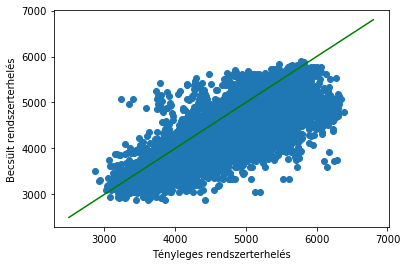

MAPE: 7.6313463589576855 %


In [10]:
data = pd.read_csv('Data_Expansion.csv')
data.__delitem__('export')
data.__delitem__('import')

#Krisz:
TARGET = 'system_load'
data['target'] = data[TARGET].copy()
data.__delitem__(TARGET)
# data.__delitem__('avg_sysload')
# data.__delitem__('avg_import')
# data.__delitem__('avg_export')
# data.__delitem__('std_sysload')
# data.__delitem__('std_import')
# data.__delitem__('std_export')
# data.__delitem__('max')
# data.__delitem__('min')
# data.__delitem__('rain')
# data.__delitem__('snow')
# data.__delitem__('avg_max')
# data.__delitem__('avg_min') 
    
for x in [24,48,96,168]:
    data["Lag"+str(x)]=data['target'].shift(x)   
    
# do rolling evaluation on 2016
preds = rolling_prediction_scheme(data, \
                                  from_date = date(2016, 1, 9),\
                                  to_date = date(2017, 3, 31), \
                                  retrain_how_often_days = 1)
    
#scatterplot
plt.scatter(preds['target'],preds['prediction'])
plt.xlabel('Tényleges rendszerterhelés')
plt.ylabel('Becsült rendszerterhelés')
plt.plot([2500,6800],[2500,6800],color="green")
plt.show()
    
print('MAPE: {} %'.format(mape(preds['target'], preds['prediction'])))    

In [17]:
#1-2 rossz
#3    GBM, 1 napi, idojaras, mean_std,       : 3.3839%
#4    GBM, 1 napi, idojaras,         ,       : 3.3034%
#5    GBM, 1 napi,         ,         ,       : 6.0964%
#6    GBM, 1 napi,         ,         , shift : 2.5854%
#7    GBM, 1 napi, idojaras, mean_std, shift : 2.6736%
#8    GBM, 1 napi, idojaras,         , shift : 2.6748%
#9 logreg: 3 napi,         ,         , shift : 6.81698% - 4+ oras futas 
#10   KNN: 1 napi,         ,         , shift : 4.54698% - leggyorsabb
#11   KNN: 1 napi, idojaras, mean_std, shift : 4.8214%
#12   KNN: 1 napi, idojaras,         , shift : 4.5426%
#13   KNN: 1 napi,         , mean_std, shift : 4.8207%
#14   KNN: 1 napi, idojaras, mean_std,       : 9.12989%
#15   KNN: 1 napi,         ,         ,       : 7.6313%

In [38]:
print(data)

             date  tick  max  min  rain  snow  avg_max  avg_min  day_of_week  \
0      2016-01-01     0   -3  -10     0   0.0        2       -2          4.0   
1      2016-01-01     1   -3  -10     0   0.0        2       -2          4.0   
2      2016-01-01     2   -3  -10     0   0.0        2       -2          4.0   
3      2016-01-01     3   -3  -10     0   0.0        2       -2          4.0   
4      2016-01-01     4   -3  -10     0   0.0        2       -2          4.0   
5      2016-01-01     5   -3  -10     0   0.0        2       -2          4.0   
6      2016-01-01     6   -3  -10     0   0.0        2       -2          4.0   
7      2016-01-01     7   -3  -10     0   0.0        2       -2          4.0   
8      2016-01-01     8   -3  -10     0   0.0        2       -2          4.0   
9      2016-01-01     9   -3  -10     0   0.0        2       -2          4.0   
10     2016-01-01    10   -3  -10     0   0.0        2       -2          4.0   
11     2016-01-01    11   -3  -10     0 